In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.font_manager

In [3]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [5]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [6]:
map_df.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
map_df = map_df.to_crs("EPSG:3395")

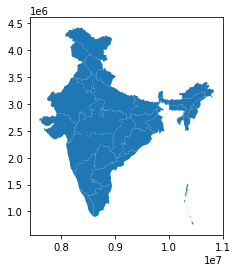

In [8]:
map_df = map_df[['State_Name', 'geometry']]
map_df.plot()

In [9]:
map_df.State_Name

0                            Andaman & Nicobar
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                        Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                   Tamilnadu
14                               Chhattishgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

In [10]:
map_df['State_Name'] = map_df['State_Name'].str.upper()
map_df.head()

,State_Name,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400..."
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223..."
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212..."
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392..."


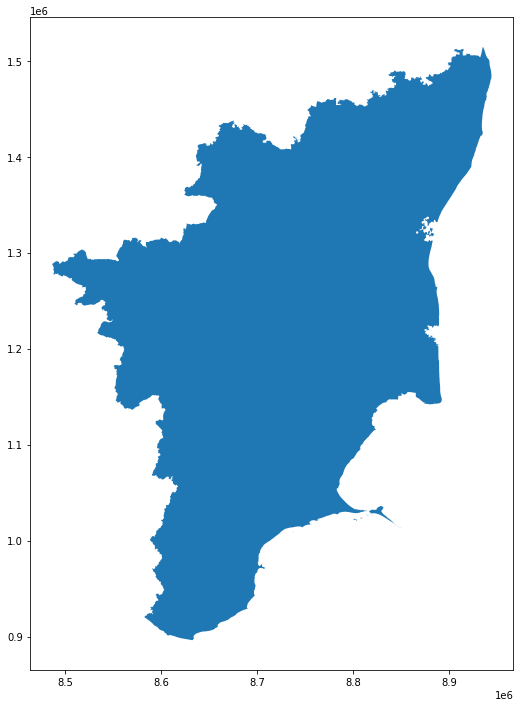

In [11]:
map_df[map_df['State_Name'] == 'TAMILNADU'].plot(figsize=(12, 12))

In [12]:
map_df.State_Name

0                            ANDAMAN & NICOBAR
1                                   CHANDIGARH
2     DAMAN AND DIU AND DADRA AND NAGAR HAVELI
3                                        DELHI
4                                      HARYANA
5                                    JHARKHAND
6                                    KARNATAKA
7                                       KERALA
8                                  LAKSHADWEEP
9                               MADHYA PRADESH
10                                 MAHARASHTRA
11                                      ODISHA
12                                  PUDUCHERRY
13                                   TAMILNADU
14                               CHHATTISHGARH
15                                   TELENGANA
16                              ANDHRA PRADESH
17                                  PUDUCHERRY
18                                         GOA
19                            HIMACHAL PRADESH
20                                      PUNJAB
21           

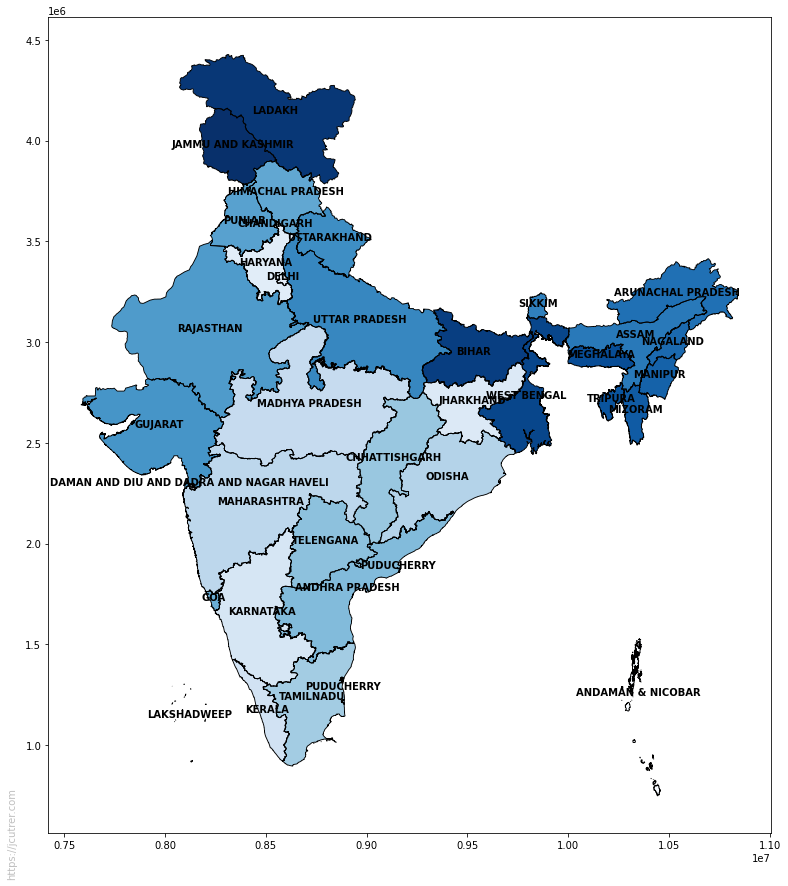

In [13]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.State_Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [14]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/dataset_original/suicide_rate.xlsx")
df.head()

,2020.0,2021.0,Percentage Variation in 2021 over 2020,State/UT,State Code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,7043.0,8067.0,14.5,Andhra Pradesh,AD,15.3,4173.0,51.73
1,160.0,160.0,0.0,Arunachal Pradesh,AR,10.4,113.0,70.63
2,3243.0,3262.0,0.6,Assam,AS,9.3,1492.0,45.74
3,809.0,827.0,2.2,Bihar,BR,0.7,422.0,51.03
4,7710.0,7828.0,1.5,Chhattishgarh,CG,26.4,5117.0,65.37


In [15]:
df['State/UT'] = df['State/UT'].str.upper()
df.fillna(0,inplace=True)
df.head()

,2020.0,2021.0,Percentage Variation in 2021 over 2020,State/UT,State Code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,7043.0,8067.0,14.5,ANDHRA PRADESH,AD,15.3,4173.0,51.73
1,160.0,160.0,0.0,ARUNACHAL PRADESH,AR,10.4,113.0,70.63
2,3243.0,3262.0,0.6,ASSAM,AS,9.3,1492.0,45.74
3,809.0,827.0,2.2,BIHAR,BR,0.7,422.0,51.03
4,7710.0,7828.0,1.5,CHHATTISHGARH,CG,26.4,5117.0,65.37


In [16]:
df['State/UT'] = df['State/UT'].str.upper()
df.fillna(0,inplace=True)
df.head()

,2020.0,2021.0,Percentage Variation in 2021 over 2020,State/UT,State Code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,7043.0,8067.0,14.5,ANDHRA PRADESH,AD,15.3,4173.0,51.73
1,160.0,160.0,0.0,ARUNACHAL PRADESH,AR,10.4,113.0,70.63
2,3243.0,3262.0,0.6,ASSAM,AS,9.3,1492.0,45.74
3,809.0,827.0,2.2,BIHAR,BR,0.7,422.0,51.03
4,7710.0,7828.0,1.5,CHHATTISHGARH,CG,26.4,5117.0,65.37


In [17]:
df.rename(columns = {'State/UT':'State_Name'}, inplace = True)
df.rename(columns = {'State Code':'State_code'}, inplace = True)
df.rename(columns = {'Percentage Variation in 2021 over 2020':'change_pt'}, inplace = True)
df.rename(columns = {'2020.0':'y20'}, inplace = True)
df.rename(columns = {'2020.0':'y21'}, inplace = True)
df.head()

,2020.0,2021.0,change_pt,State_Name,State_code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,7043.0,8067.0,14.5,ANDHRA PRADESH,AD,15.3,4173.0,51.73
1,160.0,160.0,0.0,ARUNACHAL PRADESH,AR,10.4,113.0,70.63
2,3243.0,3262.0,0.6,ASSAM,AS,9.3,1492.0,45.74
3,809.0,827.0,2.2,BIHAR,BR,0.7,422.0,51.03
4,7710.0,7828.0,1.5,CHHATTISHGARH,CG,26.4,5117.0,65.37


In [18]:
map_df = map_df.merge(df,on='State_Name')
map_df.head()

,State_Name,geometry,2020.0,2021.0,change_pt,State_code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",180.0,159.0,-11.7,AN,39.7,97.0,61.01
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",128.0,120.0,-6.3,CH,9.9,46.0,38.33
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",156.0,171.0,9.6,DNHDD,15.4,113.0,66.08
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",3142.0,2840.0,-9.6,DL,13.7,1424.0,50.14
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",4001.0,3692.0,-7.7,HR,12.5,2101.0,56.91


In [19]:
map_df.head()

,State_Name,geometry,2020.0,2021.0,change_pt,State_code,Suicide_rate,income_lessthan1,pt_pop_less_lakh
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",180.0,159.0,-11.7,AN,39.7,97.0,61.01
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",128.0,120.0,-6.3,CH,9.9,46.0,38.33
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",156.0,171.0,9.6,DNHDD,15.4,113.0,66.08
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",3142.0,2840.0,-9.6,DL,13.7,1424.0,50.14
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",4001.0,3692.0,-7.7,HR,12.5,2101.0,56.91


In [20]:
map_df.shape

(37, 9)

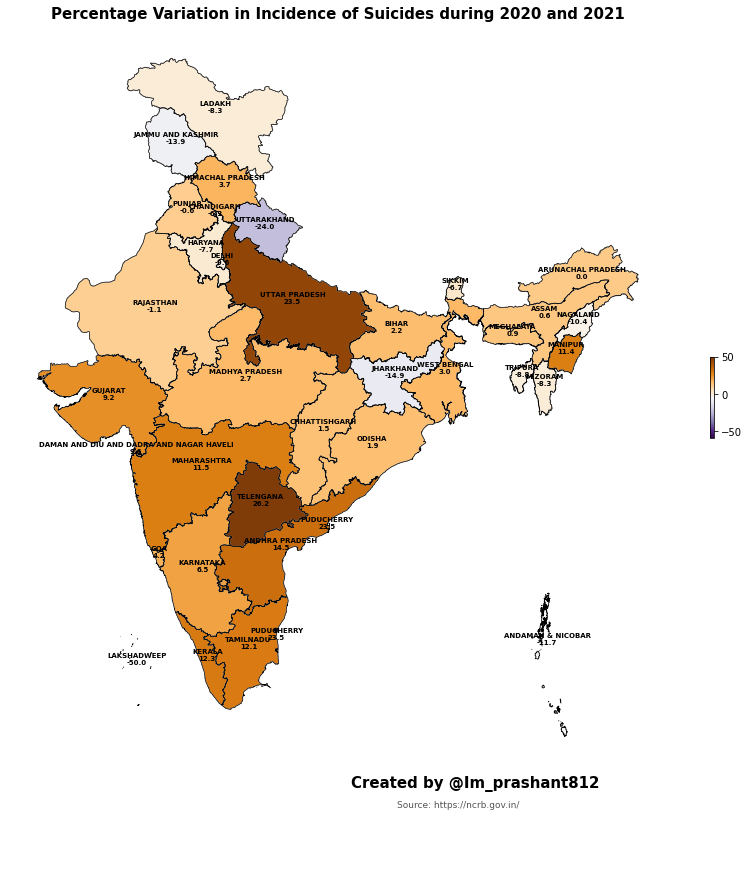

In [21]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.State_Name + "\n" + str(x.change_pt), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=7,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.55)
map_df.plot(ax=ax, cmap='PuOr_r', figsize=(12, 12))


ax.axis('off')
ax.set_title('Percentage Variation in Incidence of Suicides during 2020 and 2021', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

#ax.annotate('Created by @Im_prashant812',xy=(0.85, 0.8),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.change_pt, cmap='PuOr_r', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = -60, 50
sm = plt.cm.ScalarMappable(cmap='PuOr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

#map_df.plot(column=Total_cases, cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

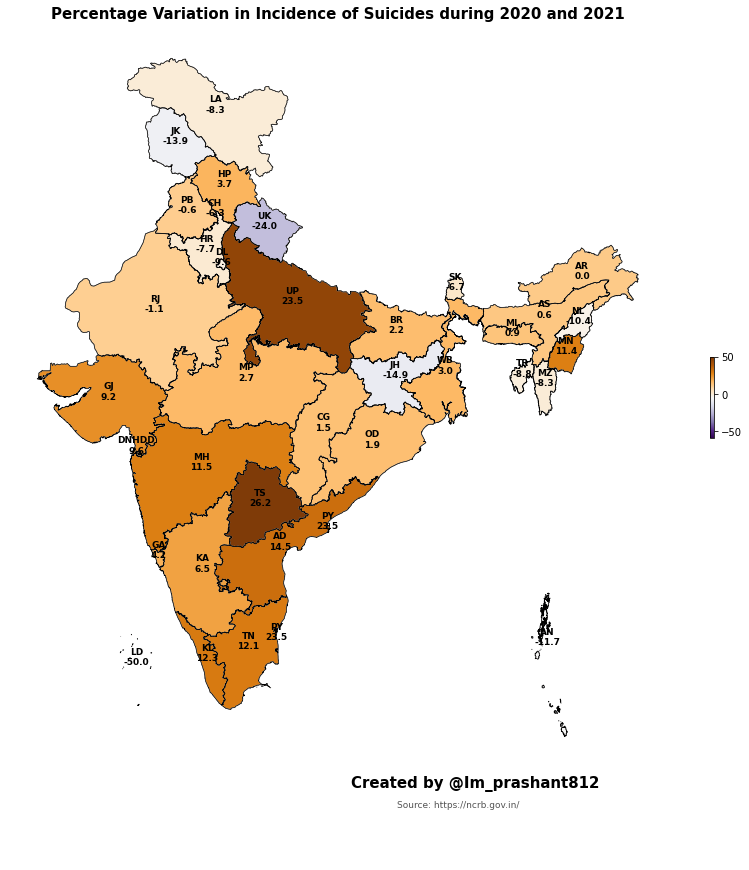

In [22]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.change_pt), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='PuOr_r', figsize=(12, 12))


ax.axis('off')
ax.set_title('Percentage Variation in Incidence of Suicides during 2020 and 2021', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.change_pt, cmap='PuOr_r', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = -60, 50
sm = plt.cm.ScalarMappable(cmap='PuOr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

#map_df.plot(column=Total_cases, cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

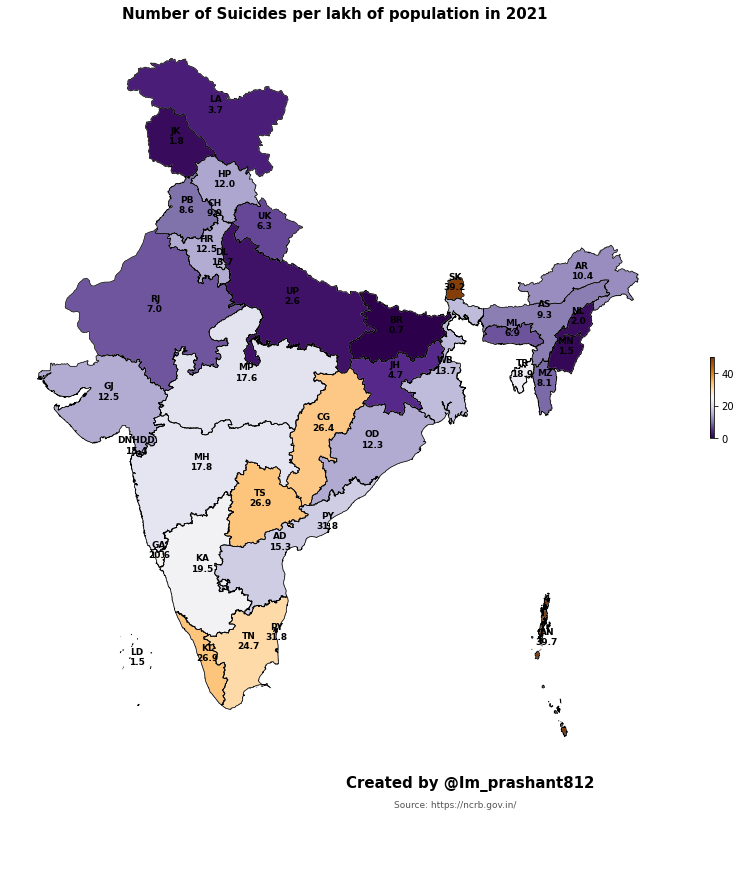

In [23]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.Suicide_rate), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='PuOr_r', figsize=(12, 12))


ax.axis('off')
ax.set_title('Number of Suicides per lakh of population in 2021 ', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.Suicide_rate, cmap='PuOr_r', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 50
sm = plt.cm.ScalarMappable(cmap='PuOr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

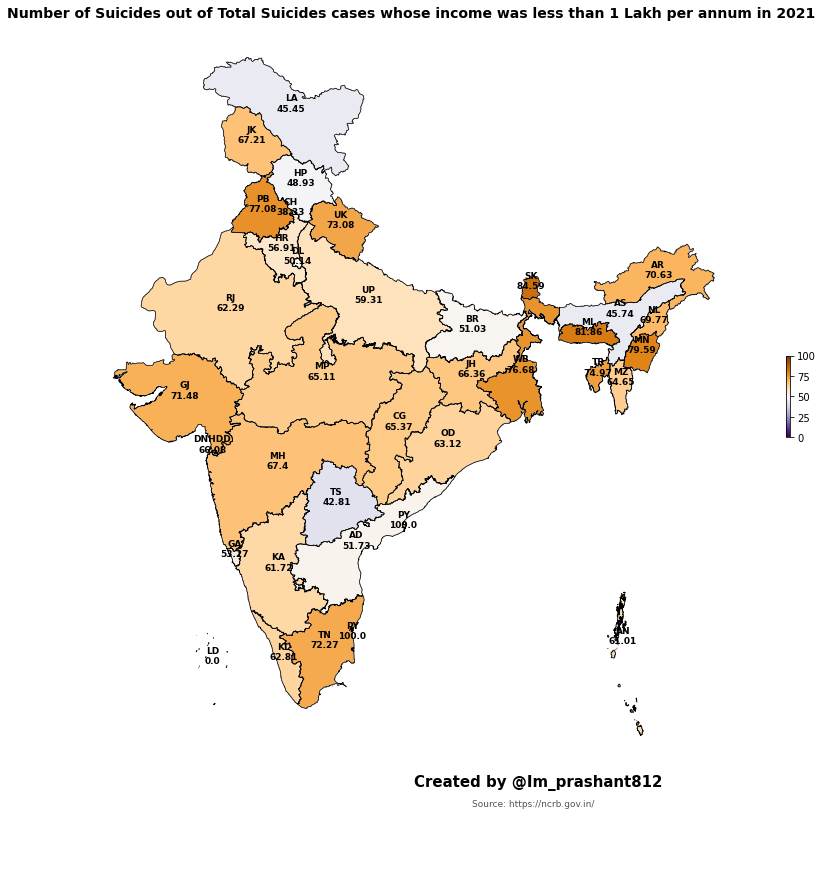

In [30]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.State_code + "\n" + str(x.pt_pop_less_lakh), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=9,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.6)
map_df.plot(ax=ax, cmap='PuOr_r', figsize=(12, 12))


ax.axis('off')
ax.set_title('Number of Suicides out of Total Suicides cases whose income was less than 1 Lakh per annum in 2021 ', fontdict={'fontsize': '14', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://ncrb.gov.in/',xy=(0.57, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.pt_pop_less_lakh, cmap='PuOr_r', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap='PuOr_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)